In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

np.random.seed(123)

#### 1. A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.

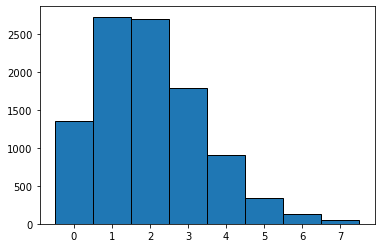

In [2]:
x = stats.poisson(2).rvs(10000)
plt.hist(x, bins=range(0, 9), align='left', width=1, edgecolor='black')
plt.show()

#### 1a. What is the probability that no cars drive up in the noon hour?

In [3]:
# experimental
(np.random.poisson(2, size=1_000_000) == 0).mean()

0.134977

In [4]:
# theoretical
stats.poisson(2).pmf(0)

0.1353352832366127

#### 1b. What is the probability that 3 or more cars come through the drive through?

In [5]:
# experimental
(np.random.poisson(2, size=1_000_000) >= 3).mean()

0.323409

In [6]:
# theoretical
stats.poisson(2).sf(2)

0.32332358381693654

#### How likely is it that the drive through gets at least 1 car?

In [7]:
# experimental
(np.random.poisson(2, size=1_000_000) >= 1).mean()

0.864684

In [8]:
# theoretical
stats.poisson(2).sf(0)

0.8646647167633873

#### 2. Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:

In [9]:
μ = 3
σ = .3

In [10]:
grades = stats.norm(μ, σ)

In [11]:
n_simulations = 1_000_000
grades_df = pd.DataFrame(np.random.normal(µ, σ, size=n_simulations)).sort_values(by=0)

#### 2a. What grade point average is required to be in the top 5% of the graduating class?

In [12]:
# experimental
grades_df.iloc[int(n_simulations * .95)]

0    3.493636
Name: 210093, dtype: float64

In [13]:
pd.DataFrame(grades.rvs(n_simulations)).iloc[int(n_simulations * .95)]

0    2.642642
Name: 950000, dtype: float64

In [14]:
# theoretical
grades.ppf(.95)

3.4934560880854417

#### 2b. What GPA constitutes the bottom 15% of the class?

In [15]:
# experimental
grades_df.iloc[int(n_simulations * .15)]

0    2.689361
Name: 155931, dtype: float64

In [16]:
# theoretical
grades.ppf(.15)

2.689069983151863

#### 2c. An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?

In [17]:
# experiemntal 
min = grades_df.iloc[int(n_simulations * .2)][0]
max = grades_df.iloc[int(n_simulations * .3)][0]
gpa = 2.8

2.8 > min and 2.8 < max

True

In [18]:
# theoretical
min = grades.ppf(.2)
max = grades.ppf(.3)
gpa = 2.8

2.8 > min and 2.8 < max

True

#### 2d. If I have a GPA of 3.5, what percentile am I in?

In [19]:
# experimental


In [20]:
# theoretical
grades.cdf(3.5)

0.9522096477271853

#### 3. A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people or more click through?


In [21]:
n_simulations = 1_000_000
n_trials = 4326
p = .02

In [22]:
# experimental
(stats.binom(n_trials, p).rvs(n_simulations) >= 97).mean()

0.139362

In [23]:
# theoretical
stats.binom(n_trials, p).sf(96)

0.13975823631416445

#### 4. You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each question. What is the probability that at least one of your first 60 answers is correct?


In [24]:
n_simulations = 1_000_000
n_trials = 60
p = 1/101

In [25]:
# experimental
(stats.binom(n_trials, p).rvs(n_simulations) >= 1).mean()

0.450144

In [26]:
# theoretical
stats.binom(60, 1/101).sf(0)

0.44955038406224

#### 5. The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. 

In [27]:
n_simulations = 100_000
n_trials = int((.9 * 3 * 22)) # number of students visit each day
p = .03

#### 5a. How likely is it that the break area gets cleaned up each day? 

In [28]:
# experimental
(stats.binom(n_trials, p).rvs(n_simulations) > 0).mean()

0.83399

In [29]:
# theoretical
stats.binom(n_trials, p).sf(0)

0.8342199288437352

In [30]:
# theoretical
1 - stats.binom(n_trials, p).pmf(0)

0.8342199288437355

In [31]:
# theoretical
1 - (.97 ** n_trials)

0.8342199288437355

#### 5b. How likely is it that it goes two days without getting cleaned up? 


In [32]:
days = 2

In [33]:
# experimental
(stats.binom(n_trials * days, p).rvs(n_simulations) == 0).mean()

0.02772

In [34]:
# theoretical
stats.binom(n_trials * days, p).pmf(0)

0.027483031992576134

In [35]:
# theoretical
.97 ** (n_trials * days)

0.027483031992576134

#### 5c. All week?

In [36]:
days = 5

In [37]:
# experimental
(stats.binom(n_trials * days, p).rvs(n_simulations) == 0).mean()

0.00012

In [38]:
# theoretical
stats.binom(n_trials * days, p).pmf(0)

0.00012521651388091245

In [39]:
# theoretical
.97 ** (n_trials * days)

0.00012521651388091245

#### 6. You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.


In [40]:
μ = 15  # mean number of people in line at lunch start
σ = 3   # std dev of number of people in line at lunch start

order_time = 2  # 2 minutes for each person to order
wait_time = 10  # 10 minutes from ordering to getting food
lunch_time = 60 # 60 minute lunch break

In [41]:
# experimental
(stats.norm(μ * order_time, σ * order_time).rvs(n_simulations) <= (lunch_time - 15)).mean()

0.99397

In [42]:
# theoretical
stats.norm(μ * order_time, σ * order_time).cdf(lunch_time - 15)

0.9937903346742238

#### 7. Connect to the employees database and find the average salary of current employees, along with the standard deviation. For the following questions, calculate the answer based on modeling the employees salaries with a normal distribution defined by the calculated mean and standard deviation then compare this answer to the actual values present in the salaries dataset.

In [43]:
from env import get_db_url, user, password, host

In [44]:
url = get_db_url('employees')
sql = '''SELECT salary FROM salaries'''

salaries = pd.DataFrame(pd.read_sql(sql, url))

In [45]:
μ = salaries.mean()
σ = salaries.std()

#### 7a. What percent of employees earn less than 60,000?

In [46]:
# based on a theoretical normal distribution
stats.norm(µ, σ).cdf(60_000)[0]

0.41082494791346336

In [47]:
# actual observed values
len(salaries[salaries.salary < 60_000]) / len(salaries)

0.4739837281170107

#### 7b. What percent of employees earn more than 95,000?

In [48]:
# based on normal distribution
stats.norm(µ, σ).sf(95_000)[0]

0.03251945131024502

In [49]:
# actual observed values
len(salaries[salaries.salary > 95_000]) / len(salaries)

0.053557131791422574

#### 7c. What percent of employees earn between 65,000 and 80,000?

In [50]:
# based on a normal distribution
(stats.norm(µ, σ).cdf(80_000)[0]
- stats.norm(µ, σ).sf(65_000)[0])

0.3589279495355246

In [51]:
# actual observed values 
len(salaries[salaries.salary >= 65_000]
            [salaries.salary <= 80_000]) / len(salaries)

/var/folders/zb/3lg9b5xn3831bhkh23bd5bs00000gn/T/ipykernel_69566/492890421.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(salaries[salaries.salary >= 65_000]


0.24330786375893226

#### 7d. What do the top 5% of employees make?

In [52]:
# based on a normal distribution
stats.norm(µ, σ).isf(.05)[0]

91616.71784707882

In [53]:
# actual observed values
idx_95 = int(len(salaries) * .95 - 1) # 95th percentile index
salaries.sort_values(by='salary').iloc[idx_95:].min()[0]

95761